In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


In [96]:
df = pd.read_csv("../Web-Scraping-Player-Details/cleaned_player_details_data/combined_dataset.csv", index_col=False)
df.head()

,Player,Position,Weight,Team,Nationality,Game_Year,Region,Selection_Type,Height_Feet,Height_Inch,Height_In_Inches,NBA_Draft_Year,NBA_Draft_Round,NBA_Draft_Pick
0,Tiny Archibald,PG,150,Boston Celtics,United States,1980,East,Coaches,6,1,73,1970,2,2
1,Larry Bird,SF,220,Boston Celtics,United States,1980,East,Coaches,6,9,81,1978,1,6
2,Bill Cartwright,C,245,New York Knicks,United States,1980,East,Coaches,7,1,85,1979,1,3
3,Dave Cowens,FC,230,Boston Celtics,United States,1980,East,Coaches,6,9,81,1970,1,4
4,John Drew,GF,205,Atlanta Hawks,United States,1980,East,Fans,6,6,78,1974,2,7


In [97]:
df = df[(df['NBA_Draft_Round'] != '-') & (df['NBA_Draft_Pick'] != '-')]

df['NBA_Draft_Round'] = pd.to_numeric(df['NBA_Draft_Round'])
df['NBA_Draft_Pick'] = pd.to_numeric(df['NBA_Draft_Pick'])

In [98]:
# Use NBA Draft data to predict the player
features = df[['NBA_Draft_Year', 'NBA_Draft_Round', 'NBA_Draft_Pick']]
target = df['Player']
target = target.loc[features.index]

X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.2, random_state=33)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

val_predictions = nb_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

test_predictions = nb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Validation Accuracy: 85.14%
Test Accuracy: 82.67%


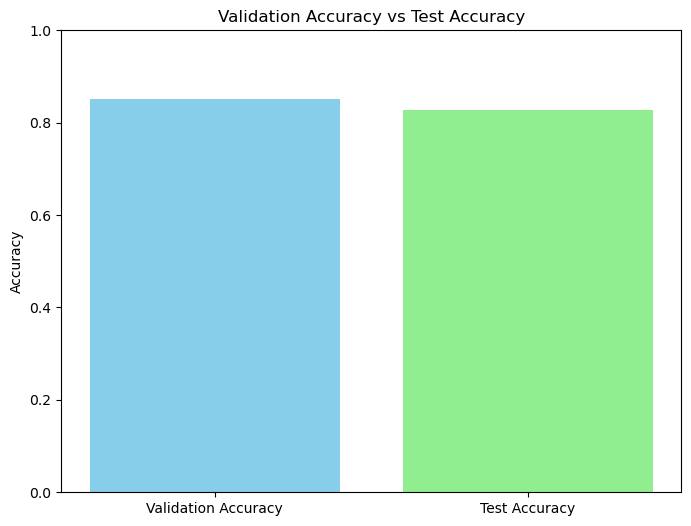

In [99]:
labels = ['Validation Accuracy', 'Test Accuracy']
accuracies = [val_accuracy, test_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['skyblue', 'lightgreen'])
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs Test Accuracy')
plt.ylim(0, 1) 
plt.show()

In [101]:
# generating precision, recall, and f1 score
report = classification_report(y_test, test_predictions)

print("Classification Report:")
print(report)

Classification Report:
                    precision    recall  f1-score   support

    Adrian Dantley       1.00      1.00      1.00         1
      Alex English       0.33      1.00      0.50         1
   Alonzo Mourning       1.00      1.00      1.00         1
   Alvin Robertson       1.00      1.00      1.00         1
  Andrei Kirilenko       0.00      0.00      0.00         0
     Artis Gilmore       1.00      1.00      1.00         2
      Bernard King       1.00      1.00      1.00         1
     Bill Laimbeer       1.00      1.00      1.00         1
    Brad Daugherty       1.00      1.00      1.00         1
     Buck Williams       1.00      1.00      1.00         1
  Chauncey Billups       1.00      1.00      1.00         1
       Chris Kaman       0.00      0.00      0.00         1
      Chris Mullin       1.00      1.00      1.00         2
      Chris Webber       1.00      1.00      1.00         1
    Cliff Robinson       0.00      0.00      0.00         1
     Clyde Drexl

/Users/tori/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tori/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tori/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tori/anaconda3/lib/python3.10/si

In [107]:
# Use player height, weight, & game year to predict player
features = df[['Height_In_Inches', 'Weight', 'Position']]
target = df['Player']

label_encoder = LabelEncoder()
features['Position'] = label_encoder.fit_transform(features['Position'])


X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.2, random_state=33)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

val_predictions = nb_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

test_predictions = nb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Validation Accuracy: 82.43%
Test Accuracy: 81.33%


/var/folders/f6/ng6svcbs3x527pvn9dvrsjjr0000gn/T/ipykernel_6562/2353554995.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Position'] = label_encoder.fit_transform(features['Position'])


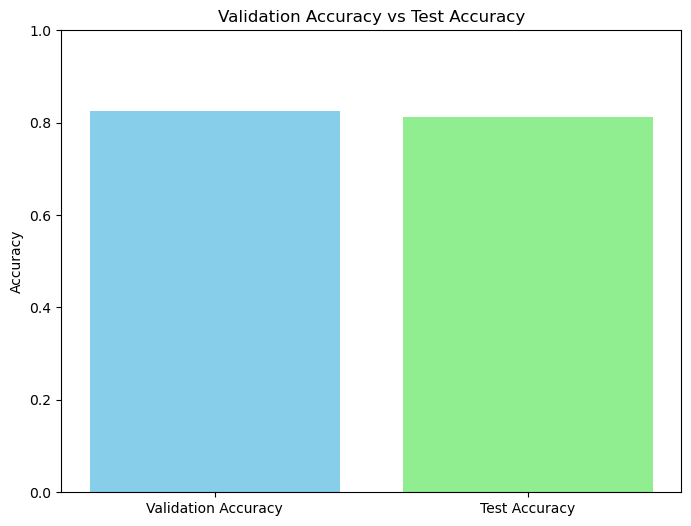

In [108]:
labels = ['Validation Accuracy', 'Test Accuracy']
accuracies = [val_accuracy, test_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['skyblue', 'lightgreen'])
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs Test Accuracy')
plt.ylim(0, 1)
plt.show()

In [109]:
# generating precision, recall, and f1 score
report = classification_report(y_test, test_predictions)

print("Classification Report:")
print(report)

Classification Report:
                    precision    recall  f1-score   support

    Adrian Dantley       1.00      1.00      1.00         1
      Alex English       1.00      1.00      1.00         1
   Alonzo Mourning       1.00      1.00      1.00         1
   Alvin Robertson       1.00      1.00      1.00         1
     Artis Gilmore       1.00      1.00      1.00         2
      Bernard King       1.00      1.00      1.00         1
     Bill Laimbeer       1.00      1.00      1.00         1
    Brad Daugherty       1.00      1.00      1.00         1
     Buck Williams       1.00      1.00      1.00         1
       Calvin Natt       0.00      0.00      0.00         0
  Chauncey Billups       1.00      1.00      1.00         1
       Chris Kaman       0.00      0.00      0.00         1
      Chris Mullin       1.00      1.00      1.00         2
      Chris Webber       1.00      1.00      1.00         1
    Cliff Robinson       0.00      0.00      0.00         1
     Clyde Drexl

/Users/tori/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tori/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tori/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tori/anaconda3/lib/python3.10/si

In [110]:
features = df[['Team', 'Nationality', 'Position']]
target = df['Player']

from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in ['Team', 'Nationality', 'Position']:
    label_encoders[column] = LabelEncoder()
    features[column] = label_encoders[column].fit_transform(features[column])


X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.2, random_state=33)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

val_predictions = nb_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

test_predictions = nb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Validation Accuracy: 71.62%
Test Accuracy: 64.00%


/var/folders/f6/ng6svcbs3x527pvn9dvrsjjr0000gn/T/ipykernel_6562/3617723847.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column] = label_encoders[column].fit_transform(features[column])
/var/folders/f6/ng6svcbs3x527pvn9dvrsjjr0000gn/T/ipykernel_6562/3617723847.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column] = label_encoders[column].fit_transform(features[column])
/var/folders/f6/ng6svcbs3x527pvn9dvrsjjr0000gn/T/ipykernel_6562/3617723847.py:8: SettingWithCopyWarning: 
A va

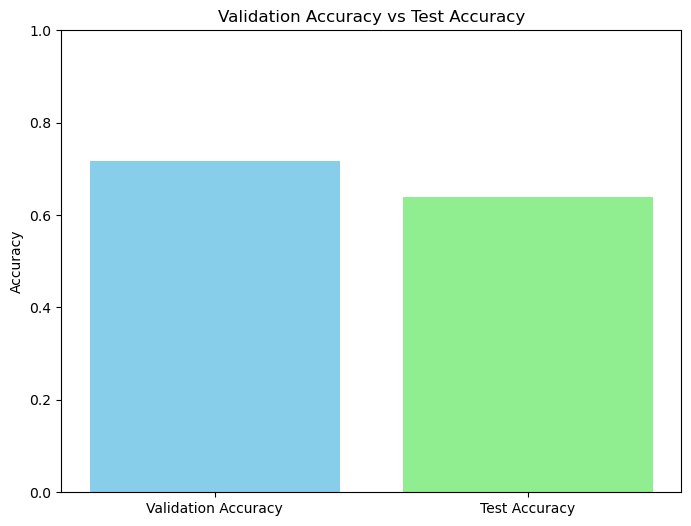

In [111]:
labels = ['Validation Accuracy', 'Test Accuracy']
accuracies = [val_accuracy, test_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['skyblue', 'lightgreen'])
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs Test Accuracy')
plt.ylim(0, 1)  
plt.show()

In [112]:
# generating precision, recall, and f1 score
report = classification_report(y_test, test_predictions)

print("Classification Report:")
print(report)

Classification Report:
                     precision    recall  f1-score   support

     Adrian Dantley       1.00      1.00      1.00         1
       Alex English       1.00      1.00      1.00         1
      Allen Iverson       0.00      0.00      0.00         0
    Alonzo Mourning       0.00      0.00      0.00         1
    Alvin Robertson       0.00      0.00      0.00         1
      Artis Gilmore       0.00      0.00      0.00         2
       Bernard King       0.00      0.00      0.00         1
      Bill Laimbeer       1.00      1.00      1.00         1
     Brad Daugherty       1.00      1.00      1.00         1
      Buck Williams       1.00      1.00      1.00         1
    Charles Barkley       0.00      0.00      0.00         0
   Chauncey Billups       1.00      1.00      1.00         1
        Chris Kaman       0.00      0.00      0.00         1
       Chris Mullin       0.67      1.00      0.80         2
       Chris Webber       1.00      1.00      1.00         1


/Users/tori/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tori/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tori/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tori/anaconda3/lib/python3.10/si